In [1]:
%pylab inline
import glob 
import plot_is

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


Acctually accretion rate information mdot is stored inside (~csv file )

#### Inside output_sink_csv

In [18]:
import pandas as pd
timestep = 1
sink_info = np.loadtxt("output_00001/sink_00001.csv",
dtype=[('id', '|O8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'),
       ('vx', '<f8'), ('vy', '<f8'), ('vz', '<f8'),
      ('lx', '<f8'), ('ly', '<f8'), ('lz', '<f8'),
       ('dt', '<f8'), ('dMdt', '<f8')
      ])
# sink_info =  pd.read_csv()
print sink_info

ValueError: invalid literal for float(): 1.0000000000E-10,

In [17]:
sink_info.dtypes

         1                object
    1.0000000000E-10      object
    0.0000000000E+00      object
    0.0000000000E+00.1    object
    0.0000000000E+00.2    object
    1.0000000000E-08      object
    1.0000000000E-08.1    object
    1.0000000000E-08.2    object
    1.0000000000E-08.3    object
    1.0000000000E-08.4    object
    1.0000000000E-08.5    object
    0.0000000000E+00.3    object
    0.0000000000E+00.4    object
dtype: object

In [17]:
msink=[]
for timestep in np.arange(1,15): 
    sink_info = np.loadtxt("output_{0}/sink_{0}.info".format(str(timestep).zfill(5)),comments="=",skiprows=4)
    msink.append(sink_info[1])

In [18]:
msink

[2.374971e-06,
 0.00028845079999999999,
 0.00057475690000000003,
 0.00085849570000000005,
 0.001144246,
 0.0014274369999999999,
 0.0017126400000000001,
 0.0019975710000000001,
 0.0022799560000000001,
 0.002564354,
 0.0028462159999999999,
 0.0031300899999999999,
 0.0034114380000000001,
 0.0036948010000000002]

In [69]:
rho_c = 1.1e-19
G = 6.67e-8
a  = 28730.5#in cm/s from sqrt(kT/m) where T = 10K
r_to_xi_factor = sqrt(4*pi*rho_c*G)/a
t_to_tau_factor = sqrt(4*pi*G*rho_c)
l_scale = 4.947e16 #code units --> cgs conversion 
t_scale = 1.95482e12
M_to_m_factor = G*sqrt(4*pi*G*rho_c)/a**3
M_sun =  1.9891e33 #grams
print "r_to_xi_factor:", r_to_xi_factor
print "t_to_tau_factor: ",t_to_tau_factor
print "M_to_m_factor: ", M_to_m_factor

r_to_xi_factor: 1.05686863016e-17
t_to_tau_factor:  3.03643641787e-13
M_to_m_factor:  8.54005117358e-34


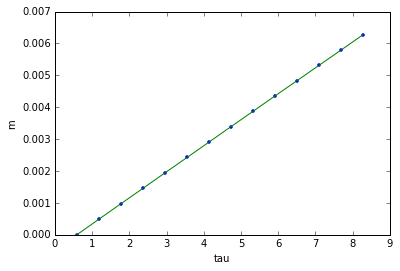

In [57]:
m = np.array(msink)*M_sun*M_to_m_factor
tstep  = np.arange(1,15)
tau = tstep*dt*t_to_tau_factor
plt.plot(tau,m,'.')
plt.plot(tau,m)
plt.xlabel("tau")
plt.ylabel("m")

In [30]:
# Using Euler's approximation : 
#     $$d ln y(r) = ln y(r + dr) − ln y(r)$$

In [63]:
dt =  1.948706918e+12 #seconds  #uniform timestep outputs [0.0618 Myrs]
dm = np.roll(m,1)-m
Mdot =  (dm/dt)[1:-1] #M_sun/second

In [66]:
Mdot

array([ -2.49374320e-16,  -2.49575049e-16,  -2.47337115e-16,
        -2.49090554e-16,  -2.46859594e-16,  -2.48613469e-16,
        -2.48376364e-16,  -2.46156998e-16,  -2.47911745e-16,
        -2.45701095e-16,  -2.47454970e-16,  -2.45253038e-16])

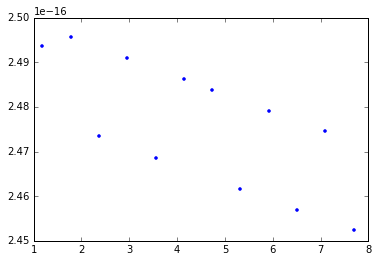

In [67]:
plt.plot(tau[1:-1],-Mdot,'.')

I think this is an artifact of rolling 

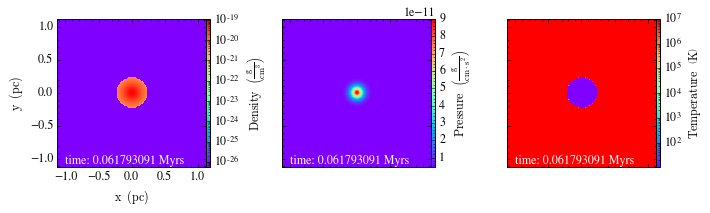

In [5]:
plot_is.check_IC_profiles()


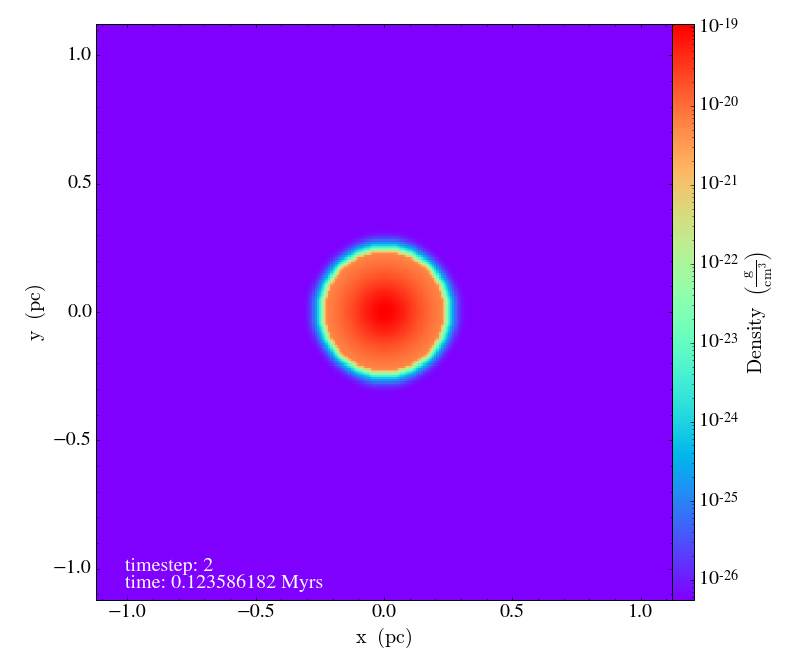

In [7]:
import yt
timestep=2
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_axes_unit('pc')
slc.set_cmap(physical_quantity,"rainbow")
slc.set_font_size(20)
slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
# slc.annotate_velocity()
slc.annotate_particles((0.1, 'pc'),p_size=1,col='cyan')
# slc.annotate_grids()
slc.show()


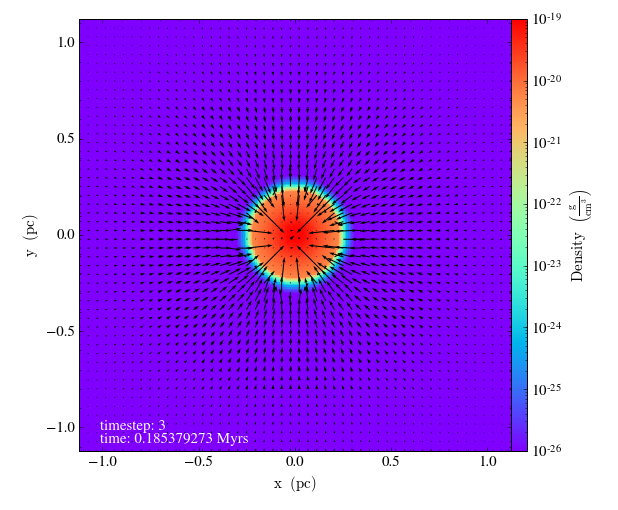

In [4]:
plot_is.plot_time_slice("density",3,plot_size=6,zmin=1e-26,zmax=1e-19)